# Data Analysis Interview Challenge

"Ultimate Data Science Challenge"

### Part 1  - Exploratory Data Analysis

Aggregate  login   counts   based   on   15­ minute   time   intervals,   and
visualize   and   describe   the   resulting   time   series   of   login   counts   in   ways   that   best   characterize   the
underlying   patterns   of   the   demand.   Report/illustrate   important   features   of   the   demand,
such   as   daily   cycles. 

In [1]:
#general
import pandas as pd
import numpy as np
import json
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt

#machine learning
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import MinMaxScaler
from sklearn import linear_model
from sklearn.model_selection import KFold, cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.ensemble import AdaBoostClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis


#deal with any warnings
from sklearn.utils.testing import ignore_warnings
from sklearn.exceptions import ConvergenceWarning
from warnings import simplefilter
# ignore all future warnings
simplefilter(action='ignore', category=FutureWarning)

/home/evan/Programming/lib/python3.7/site-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.utils.testing module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.utils. Anything that cannot be imported from sklearn.utils is now part of the private API.
  warnings.warn(message, FutureWarning)


In [2]:
#import login time data into pandas dataframe
login_df = pd.read_json(r'/home/evan/Programming/Jupiter Projects/Springboard Interview Challenge/ultimate_challenge/logins.json')
login_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93142 entries, 0 to 93141
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   login_time  93142 non-null  datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 727.8 KB


In [3]:
#resampling df to 15-minute intervals
login_df = login_df.resample("15min", on="login_time").count()

login_df.rename({"login_time":"login_count"}, axis=1, inplace=True)
login_df.reset_index(inplace=True)

In [4]:
#look at days of logins 
login_df["Day"] = login_df["login_time"].dt.day_name()


dow = [ 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
weekday_df = login_df.groupby(['Day']).sum().reindex(dow) 
weekday_df

,login_count
Day,
Monday,8823
Tuesday,9268
Wednesday,10339
Thursday,11960
Friday,15208
Saturday,19377
Sunday,18167


<font color='darkblue'>The weekend is clearly the busiest with the most logins on Friday, Saturday, and Sunday. From Monday the logins climbs as the week progresses, peaking on Saturday before falling slightly on Sunday.

In [5]:
#hourly analysis
login_df["Hour"] = login_df["login_time"].dt.hour

hourly_df = login_df.groupby("Hour").sum()[["login_count"]]

hourly_df["Average_logins"] = login_df.groupby("Hour").mean()[["login_count"]]

hourly_df

,login_count,Average_logins
Hour,,
0,5993,14.688725
1,6317,15.482843
2,5800,14.215686
3,4831,11.840686
4,5034,12.338235
5,2945,7.218137
6,1138,2.789216
7,815,1.997549
8,818,2.004902


<font color='darkblue'>The busiest hours are between 10am-1pm and 8pm-4am. It seems like there are a lot of logins during lunchtime while the majority are late at night and very early in the morning.

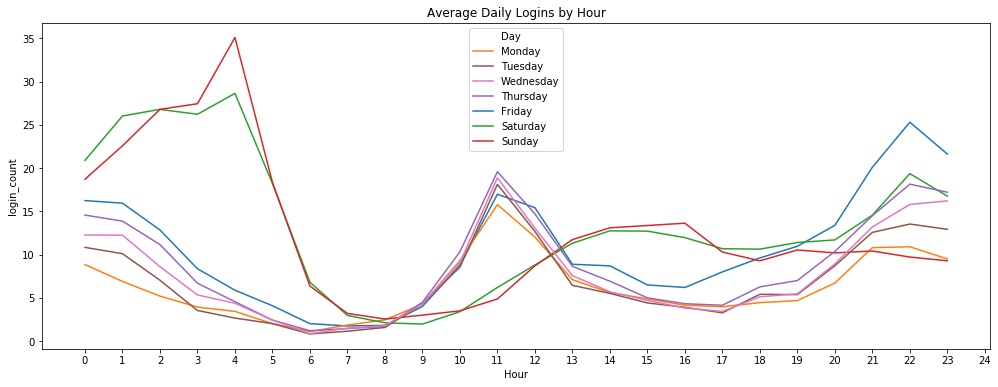

In [6]:
#plot average daily/hourly logins

login_df = login_df.groupby(["Hour", "Day"]).mean().reset_index()

f, axes = plt.subplots(figsize=(17,6))
ax = sns.lineplot(x="Hour", y="login_count", data=login_df, hue="Day")
plt.xticks(range(0,25))

#sorts days of week in legend
handles, labels = plt.gca().get_legend_handles_labels()
order = [0, 2, 6, 7, 5, 1, 3, 4]
plt.legend([handles[idx] for idx in order],[labels[idx] for idx in order])
ax.set(title="Average Daily Logins by Hour")


plt.show()

<font color='darkblue'>Visualizing the data makes for much better analysis. While the lunch hours are prevelant and restricted to specific times during the week, on the weekend they are spread out more between 10am-5pm; people are most likely getting much later and varied starts to their days.

Now we can also see that while Friday has a lot of logins they have a separate pattern from any other day on account of being the last day of the work-week. 

People login throughout the early morning both saturday and sunday from midnight to 4am. Friday has the most logins during the evening, followed by Saturday, and Sunday has the fewest.

### Part 2 Experiment Metrics & Design

The   neighboring   cities   of   Gotham   and   Metropolis   have   complementary   circadian   rhythms:   on
weekdays,   Ultimate   Gotham   is   most   active   at   night,   and   Ultimate   Metropolis   is   most   active
during   the   day.   On   weekends,   there   is   reasonable   activity   in   both   cities.
However,   a   toll   bridge,   with   a   two ­way   toll,   between   the   two   cities   causes   driver   partners   to   tend
to   be   exclusive   to   each   city.   The   Ultimate   managers   of   city   operations   for   the   two   cities   have
proposed   an   experiment   to   encourage   driver   partners   to   be   available   in   both   cities,   by
reimbursing   all   toll   costs.</font>

1. What   would   you   choose   as   the   key   measure   of   success   of   this   experiment   in
encouraging   driver   partners   to   serve   both   cities,   and   why   would   you   choose   this   metric?</font>



<font color='darkblue'>First I think it is important to note that depending on the distance between the cities it may be more efficient and environmentally friendly to keep vehicles exclusive to one city. I would also expect driver partners to be on a similar circadian cycle to one city or the other, making it difficult for them to take advantage of both (as they also presumably need rest). This possibility contradicts the stated 'cause' (tolls) of driver partners sticking to one city - it is vital to be sure of what the cause of the problem actually is before attempting to create a solution.

Depending on the resources available, the most important measure may be tracking vehicles between the two cities. This could be done using the toll booth that is already in place. If there is a significant increase in driver partners going between cities it could be considered successful. However, if the core problem is that one city or the other is lacking driver partners during peak times it may be simpler and more to the point to gauge the availability of cars during these times in each city.

2. Describe   a   practical   experiment   you   would   design   to   compare   the   effectiveness   of   the
proposed   change   in   relation   to   the   key   measure   of   success.   Please   provide   details   on: 

<font color='darkblue'>Assuming we only care that driver partners are utilizing the toll fee reimbursements, it would be best to collect data on how often driver partners are going through the toll booth. There would need to be an initial data set prior to reimbursements in order to gauge an increase - the longer the better but 4 weeks at the least.  After the reimbursements are offered, collect the same data and see if there has been a significant increase in bridge use. 

Alternatively, if the main idea is to increase driver partner availibility in the cities during peak times, it would make more sense to collect data by logging in and gathering data on how many drivers are available, and wait times of users throughout each day of each week. Again, for at least a few weeks before implementing any changes.
</font>

a. how   you   will   implement   the   experiment

<font color='darkblue'>If driver partners are being reimbursed for their costs of the bridge toll, there will already be a system in place that could be used to keep track of how often they are going between the two cities. 

Availibility and wait times can be tracked by a data scraper that collects the data of interest every hour.</font>

b. what   statistical   test(s)   you   will   conduct   to   verify   the   significance   of   the
observation

<font color='darkblue'>Hypothesis testing (t-tests) would be a good way to compare the averaged before/after data and decide if there was a significant improvement.</font>

c. how   you   would   interpret   the   results   and   provide   recommendations   to   the   city
operations   team   along   with   any   caveats.

<font color='darkblue'>Based on the results of the hypothesis testing, the conclusion would either be that the change caused a significant improvement in the driver partner system or there was no significant change. This experiment relies primarily on increase in revenue - if the increase in usage doesn't cover the costs of the toll reimbursement then even with an improvement in availibility it would not make sense to continue with the program. </font>

### Part 3 Predictive Modeling

In [7]:
ult_data = json.load((open(r'/home/evan/Programming/Jupiter Projects/Springboard Interview Challenge/ultimate_challenge/ultimate_data_challenge.json')))

data = pd.DataFrame(ult_data)
data.head()

,city,trips_in_first_30_days,signup_date,avg_rating_of_driver,avg_surge,last_trip_date,phone,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver
0,King's Landing,4,2014-01-25,4.7,1.10,2014-06-17,iPhone,15.4,True,46.2,3.67,5.0
1,Astapor,0,2014-01-29,5.0,1.00,2014-05-05,Android,0.0,False,50.0,8.26,5.0
2,Astapor,3,2014-01-06,4.3,1.00,2014-01-07,iPhone,0.0,False,100.0,0.77,5.0
3,King's Landing,9,2014-01-10,4.6,1.14,2014-06-29,iPhone,20.0,True,80.0,2.36,4.9
4,Winterfell,14,2014-01-27,4.4,1.19,2014-03-15,Android,11.8,False,82.4,3.13,4.9


In [8]:
#create column for active users
#a user is active if they took a trip within the last 30 days of the data (within june and first day of july)
data['active_users'] = data['last_trip_date'].apply(lambda row: 1 if row >= "2014-06-01" else 0)
data.active_users.value_counts()

0    31196
1    18804
Name: active_users, dtype: int64

<font color='darkblue'> Well over half of users are not considered active on the metric of taking a trip in the preceding 30 days. There are 18,804 active users out of 50,000. While these are considered active users, everyone that has signed up has taken at least one trip even if it was on the same day and other users have taken many trips but not in the preceding 30 days of this data.

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   city                    50000 non-null  object 
 1   trips_in_first_30_days  50000 non-null  int64  
 2   signup_date             50000 non-null  object 
 3   avg_rating_of_driver    41878 non-null  float64
 4   avg_surge               50000 non-null  float64
 5   last_trip_date          50000 non-null  object 
 6   phone                   49604 non-null  object 
 7   surge_pct               50000 non-null  float64
 8   ultimate_black_user     50000 non-null  bool   
 9   weekday_pct             50000 non-null  float64
 10  avg_dist                50000 non-null  float64
 11  avg_rating_by_driver    49799 non-null  float64
 12  active_users            50000 non-null  int64  
dtypes: bool(1), float64(6), int64(2), object(4)
memory usage: 4.6+ MB


<font color='darkblue'> Not all users gave the drivers a rating and not all drivers gave the users a rating. As these null values are not a huge portion of the data, those rows will be dropped to preserve the data integrity (as opposed to filling in with mean values etc). The phone column nulls will be categorized as 'other'.

In [10]:
data = data.dropna(subset=['avg_rating_of_driver'])
data = data.dropna(subset=['avg_rating_by_driver'])

data['phone'].fillna(value='other', inplace = True)

In [11]:
#drop any unnecessary columns - ones that won't be helpful in prediction
data = data.drop(columns = ["last_trip_date", "signup_date"])

In [12]:
#use get_dummies to one-hot encode categorical features
one_hot_city = pd.get_dummies(data['city'])
one_hot_phone = pd.get_dummies(data['phone'])

#drop original columns
data = data.drop('city', axis = 1)
data = data.drop('phone', axis = 1)

#join one-hot encoded to dataframe
data = data.join(one_hot_city)
data = data.join(one_hot_phone)

#define y as dependent variable (active users) and X as independent variables
y = data[data.columns[8]]
X = data.loc[:, data.columns != 'active_users']

#split data for training and testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.7, random_state=602)

<font color='darkblue'> The following function loops through 8 different classifiers to find the one that works best on this data set.

In [13]:
#loops through all models in a list to caclulate its out of box accuracy

#create list of models with names
models = []
models.append(('LR', LogisticRegression()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('RF', RandomForestClassifier()))
models.append(('ABoo', AdaBoostClassifier()))
models.append(('SVC', LinearSVC()))

# evaluate each model
results = []
names = []
scoring = 'accuracy'
msgs = []
@ignore_warnings(category=ConvergenceWarning)
def scores_list():
    for name, model in models:
        kfold = KFold(n_splits=10, random_state=5, shuffle=True)
        cv_results = cross_val_score(model, X, y, cv=kfold, scoring=scoring)
        results.append(cv_results)
        names.append(name)
        msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
        msgs.append(msg)
scores_list()

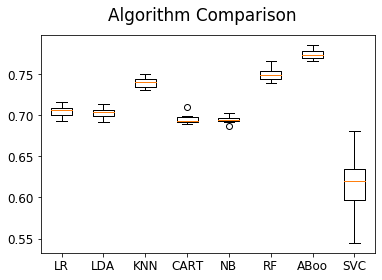

In [14]:
#plot model accuracies with a box plot
# boxplot algorithm comparison
plt.rcParams.update({'font.size': 14})
plt.rc('xtick', labelsize=12)
plt.rc('ytick', labelsize=12)

fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

<font color='darkblue'>Looks like overall the AdaBoost classifier will do the best job with this problem. Now to find the optimized parameters.

In [15]:
#find best params for adaboost using gridsearch cv
adaboost_grid = GridSearchCV(estimator=AdaBoostClassifier(),
                param_grid={'n_estimators': [50, 100, 200], 'learning_rate': [.1, .5, 1, 2]})

adaboost_grid.fit(X_train, y_train)
print(adaboost_grid)
print(adaboost_grid.best_score_)
print(adaboost_grid.best_estimator_)

GridSearchCV(cv=None, error_score=nan,
             estimator=AdaBoostClassifier(algorithm='SAMME.R',
                                          base_estimator=None,
                                          learning_rate=1.0, n_estimators=50,
                                          random_state=None),
             iid='deprecated', n_jobs=None,
             param_grid={'learning_rate': [0.1, 0.5, 1, 2],
                         'n_estimators': [50, 100, 200]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)
0.7759332134453139
AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None, learning_rate=1,
                   n_estimators=200, random_state=None)


In [16]:
#use optimized parameters to initiate the model
clf = AdaBoostClassifier(n_estimators=200, random_state=602)
clf.fit(X_train, y_train)
AdaBoostClassifier(n_estimators=100, random_state=602)


AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None, learning_rate=1.0,
                   n_estimators=100, random_state=602)

In [17]:
#print feature weights in descending order

#feature importances from the model
fi = clf.feature_importances_

#combine values and feature names
feature_importance = zip(data.loc[:, data.columns != 'active_users'], fi)

#sort by most important features
feature_importance = sorted(feature_importance, key=lambda x:x[1], reverse=True)

#print each feature
for i, j in feature_importance:
    print(f"Weight: {j:.3f} | Feature: {i}")

Weight: 0.225 | Feature: weekday_pct
Weight: 0.220 | Feature: avg_dist
Weight: 0.175 | Feature: surge_pct
Weight: 0.140 | Feature: avg_surge
Weight: 0.085 | Feature: avg_rating_by_driver
Weight: 0.075 | Feature: trips_in_first_30_days
Weight: 0.050 | Feature: avg_rating_of_driver
Weight: 0.005 | Feature: ultimate_black_user
Weight: 0.005 | Feature: Astapor
Weight: 0.005 | Feature: King's Landing
Weight: 0.005 | Feature: Winterfell
Weight: 0.005 | Feature: Android
Weight: 0.005 | Feature: other
Weight: 0.000 | Feature: iPhone


<font color='darkblue'>We can now see which features of this data set are the best predictors for an active user in their 6th month. 
    
In this model the most important predictors were what percent of the user's trips occured during a weekday, the average distance the user traveled in the first 30 days and the percentage of trips taken during a surge multiplier > 1.
    
If users have a higher percentage of trips during the weekday, there is a better chance that they have a schedule that relies on Ultimate - they need to use it consistently for their everyday lives versus other users that just use it casually during the weekends. It may be worth giving these users discounts to encourage their continuous use during the weekdays and discourage finding alternative transport. 
    
The average distance is also a decent predictor, most likely because it needs to be competetive with other forms of transport that may be cheaper or more expensive depending on the distance of the trip. In this case the longer the average distance is the more likely they will be an active user, which is good news for Ultimate. It might be a good idea to put more focus towards creating a positive experience for shorter trips, for example, offering a discount if the user takes 5 trips a week under 3 miles.
    
Overall, I would argue that this definition of an active user is not very good. It may be better to look at average trips over time to get a better understanding of the users.